Проводится расчет взрыва и фрагментации трубы (L = 10м, Д = 1.02м), в которой находится газ под давлением 7.50 MPa:
Температура газа (T): 313 K
Плотность газа: 47.27 кг/м^3
Количество осколков (n): 10
Массa металла: 5260.55 кг
Массa газа: 354.35 кг
Начальная скорость осколка (V0) 137.54 м/с

Дальность разлета: 1639.50 метров, при угле 30 градусов
Высота: 238.76 метров
Время полета: 13.95 секунд

Дальность разлета: 1883.68 метров, при угле 45 градусов
Высота: 476.04 метров
Время полета: 19.70 секунд

Дальность разлета: 1628.82 метров, при угле 60 градусов
Высота: 712.84 метров
Время полета: 24.11 секунд



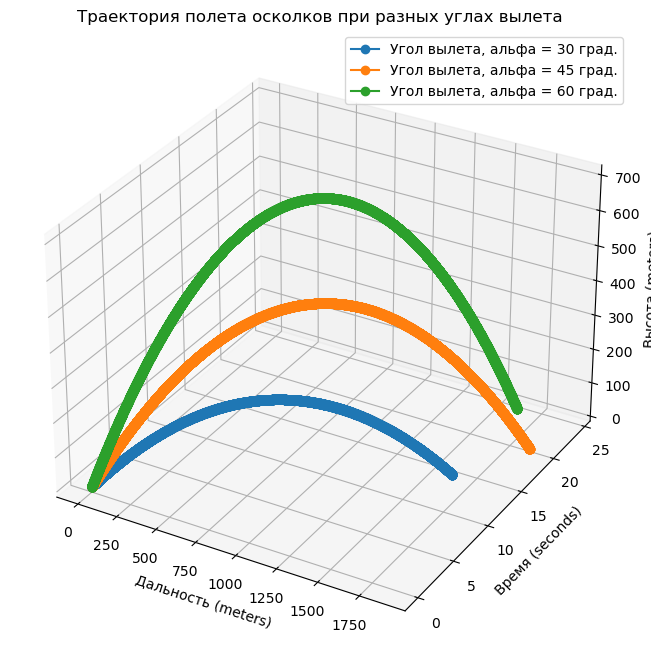

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module

# Given parameters
alphas = [30, 45, 60]  # Vary alpha at 30, 45, and 60 degrees
cx = 0.2
L = 10  # длина в метрах
rho_v = 1.225
rho_ob = 7800
n_osk = 10
g = 9.81

# Параметры для расчета плотности газа
P = 7500000  # давление газа в паскалях
P0 = 101000  # начальное давление в паскалях

R = 519  # удельная газовая постоянная для воздуха в Дж/(кг·К)
T = 273 + 40  # температура газа в Кельвинах

# Calculate the density of natural gas
pressure_pa = P  # Pressure in MPa
temperature_kelvin = T  # Temperature in Kelvin
molar_mass_g_mol = 16.4  # Molar mass of natural gas in g/mol
gas_constant_j_mol_k = 8.314  # Ideal gas constant in J/(mol·K)

volume_m3 = 1  # Assuming a volume of 1 cubic meter

# Calculate the number of moles (n) using the ideal gas law
numoles = (pressure_pa * volume_m3) / (gas_constant_j_mol_k * temperature_kelvin)

# Calculate the mass (m) of natural gas
mass_kg = numoles * molar_mass_g_mol / 1000  # Convert grams to kilograms

# Calculate the density (rho) of natural gas
rho_gaza = mass_kg / volume_m3

# Параметры для вычисления начальной скорости V0
eta = 0.5
R0 = 0.51  # в метрах (510 мм)
k = 1.4  # значение теплоемкости для воздуха
delta = 0.0215  # в метрах (21 мм)

# Вычисление A_gamma
A_gamma = (P / (rho_gaza * (k - 1))) * (1 - (P0 / P)**((k - 1) / k))

# Вычисление массы металла трубы
Ri = R0 - delta
A_truby = np.pi * (R0**2 - Ri**2)
V_truby = A_truby * L
massa_metalla = rho_ob * V_truby

# Вычисление массы газа в трубе
V_gaza = np.pi * Ri**2 * L
massa_gaza = rho_gaza * V_gaza
beta = massa_gaza/massa_metalla

# Initialize lists to store results for each alpha value
v0_list = []
w0_list = []
x_list = []
y_list = []
t_list = []

def dv_dt(v, w):
    return - (cx * rho_v * n_osk / (2 * L * rho_ob)) * np.sqrt(v**2 + w**2) * v - g

def dw_dt(v, w):
    return - (cx * rho_v * n_osk / (2 * L * rho_ob)) * np.sqrt(v**2 + w**2) * w

def dx_dt(v, w):
    return w

def dy_dt(v, w):
    return v
# Calculate and plot trajectories for each alpha value
for alpha in alphas:
    alpha_rad = alpha * np.pi / 180  # Convert degrees to radians

    # Начальная скорость V0
    V0 = np.sqrt(2 * beta * eta * A_gamma)

    # Начальные условия
    v0 = V0 * np.sin(alpha_rad)
    w0 = V0 * np.cos(alpha_rad)

    # Time steps and total time
    h = 0.001
    t_total = 300
    n = int(t_total / h)
    t = np.linspace(0, t_total, n)

    # Initializing empty arrays to store v, w, x, and y
    v = np.zeros(n)
    w = np.zeros(n)
    x = np.zeros(n)
    y = np.zeros(n)

    # Initial values
    v[0] = v0
    w[0] = w0
    x[0] = 0  # Initial position in the x direction
    y[0] = 0  # Initial position in the y direction

    i = 0
    while i < n and y[i] >= 0:
        k1_v = h * dv_dt(v[i], w[i])
        k1_w = h * dw_dt(v[i], w[i])
        k1_x = h * dx_dt(v[i], w[i])
        k1_y = h * dy_dt(v[i], w[i])

        k2_v = h * dv_dt(v[i] + 0.5 * k1_v, w[i] + 0.5 * k1_w)
        k2_w = h * dw_dt(v[i] + 0.5 * k1_v, w[i] + 0.5 * k1_w)
        k2_x = h * dx_dt(v[i] + 0.5 * k1_v, w[i] + 0.5 * k1_w)
        k2_y = h * dy_dt(v[i] + 0.5 * k1_v, w[i] + 0.5 * k1_w)

        k3_v = h * dv_dt(v[i] + 0.5 * k2_v, w[i] + 0.5 * k2_w)
        k3_w = h * dw_dt(v[i] + 0.5 * k2_v, w[i] + 0.5 * k2_w)
        k3_x = h * dx_dt(v[i] + 0.5 * k2_v, w[i] + 0.5 * k2_w)
        k3_y = h * dy_dt(v[i] + 0.5 * k2_v, w[i] + 0.5 * k2_w)

        k4_v = h * dv_dt(v[i] + k3_v, w[i] + k3_w)
        k4_w = h * dw_dt(v[i] + k3_v, w[i] + k3_w)
        k4_x = h * dx_dt(v[i] + k3_v, w[i] + k3_w)
        k4_y = h * dy_dt(v[i] + k3_v, w[i] + k3_w)

        v[i + 1] = v[i] + (k1_v + 2 * k2_v + 2 * k3_v + k4_v) / 6
        w[i + 1] = w[i] + (k1_w + 2 * k2_w + 2 * k3_w + k4_w) / 6
        x[i + 1] = x[i] + (k1_x + 2 * k2_x + 2 * k3_x + k4_x) / 6
        y[i + 1] = y[i] + (k1_y + 2 * k2_y + 2 * k3_y + k4_y) / 6

        i += 1

    n = i  # Update n to the last valid index
    t = t[:n]  # Update t to match the valid range
    y = y[:n]
    x = x[:n]

    # Append results to the lists
    v0_list.append(v0)
    w0_list.append(w0)
    x_list.append(x)
    y_list.append(y)
    t_list.append(t)

# Plotting the results in 3D
fig = plt.figure(figsize=(8, 11))
ax = fig.add_subplot(111, projection='3d')

# Plot trajectories for each alpha value
for i, alpha in enumerate(alphas):
    ax.plot(x_list[i], t_list[i], y_list[i], marker='o', linestyle='-', label=f'Угол вылета, альфа = {alpha} град.')

ax.set_xlabel('Дальность (meters)')
ax.set_ylabel('Время (seconds)')
ax.set_zlabel('Высота (meters)')
ax.set_title('Траектория полета осколков при разных углах вылета')
ax.legend()
ax.grid(True)
print(f"Проводится расчет взрыва и фрагментации трубы (L = {L:.0f}м, Д = {2*R0:.2f}м), в которой находится газ под давлением {P/1000000:.2f} MPa:")
print(f"Температура газа (T): {T} K")
print(f"Плотность газа: {rho_gaza:.2f} кг/м^3")
print(f"Количество осколков (n): {n_osk}")
print(f"Массa металла: {massa_metalla:.2f} кг")
print(f"Массa газа: {massa_gaza:.2f} кг")
print(f"Начальная скорость осколка (V0) {V0:.2f} м/с")

print()
# Calculate and print additional outputs
for i, alpha in enumerate(alphas):
    V0 = np.sqrt(v0_list[i]**2 + w0_list[i]**2)
    x_max = np.max(x_list[i])
    y_max = np.max(y_list[i])
    t_max = np.max(t_list[i])
    print(f"Дальность разлета: {x_max:.2f} метров, при угле {alpha} градусов")
    print(f"Высота: {y_max:.2f} метров")
    print(f"Время полета: {t_max:.2f} секунд")
    print()

plt.show()